### **Understanding data**

 - The goal is to build a sentiment analysis model for IMDb movie reviews using a dataset containing a collection of movie reviews along with their corresponding sentiment labels (positive or negative). This model will accurately predict the sentiment of a given movie review text.

### **import libraries**

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_excel(r'C:\Users\hp\Desktop\my projects\NLP\IMDB Datasets.xlsx')

### **Exploring Data**



In [4]:
def Data_Overview (df):
    print(f"- Dataset Shape: {df.shape}")
    
    print("--"*20)
    
    print(f'- duplication data: {df.duplicated().sum()}')
    
    print("--"*20)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values 
    summary['Missing %'] = round(df.isnull().mean()*100,2).values    
    summary['Uniques'] = df.nunique().values
    return summary.style.background_gradient(cmap ='RdBu_r')
Data_Overview(df)

- Dataset Shape: (50000, 2)
----------------------------------------
- duplication data: 418
----------------------------------------


,Name,dtypes,Missing,Missing %,Uniques
0,review,object,0,0.000000,49582
1,sentiment,object,0,0.000000,2


In [5]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True , inplace = True)

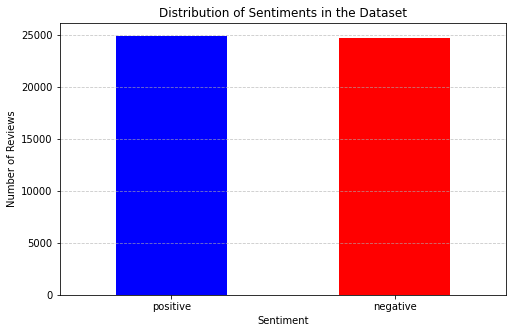

In [6]:
import matplotlib.pyplot as plt

# Count the distribution of sentiments in the dataset
sentiment_count = df['sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(8, 5))
sentiment_count.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Sentiments in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Axes: >

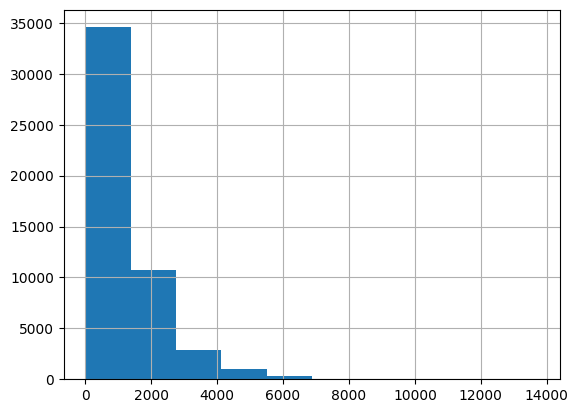

In [8]:
#exploring number of characters
df['review'].str.len().hist()

The histogram shows that reviews range from 10 to 14000 characters and generally, it is between 10 to 1500 characters.

Now, we will move on the histogram for positive review and negative review respectively. Let's plot!

Text(0.5, 1.0, 'Negative Reviews')

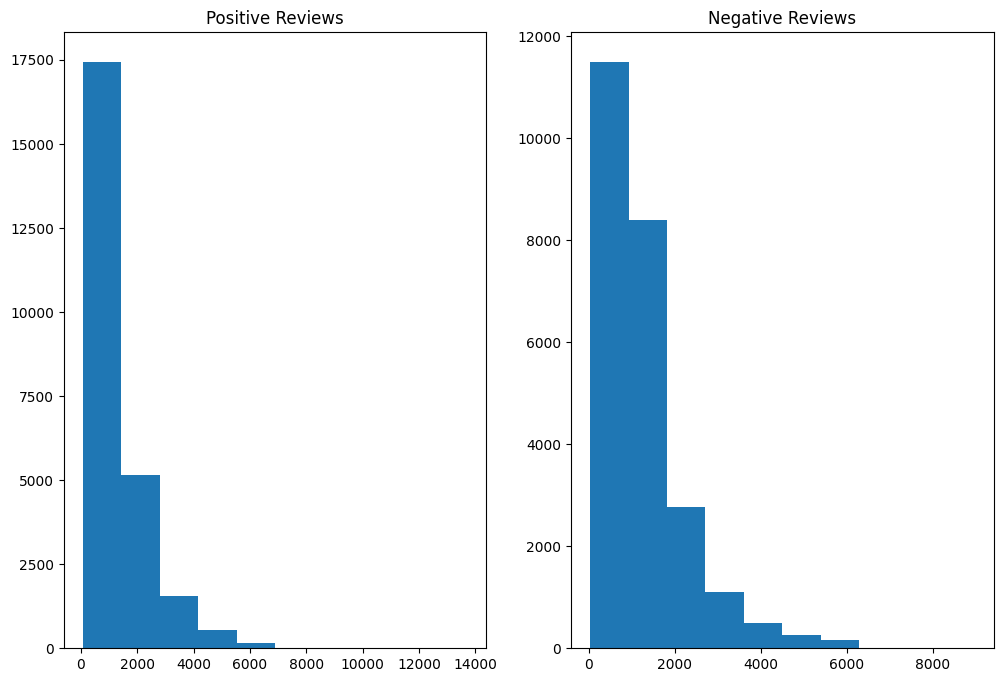

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['sentiment']=='positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')

we can observe some insights from the graph above:

In general, people comment less word in the positive review to compare with negative review
However the range of word for positive review are bigger than the range of negative review. It means in some cases, people give a long comments for excellent movies and people could less critise for bad movies
Before we move on to the next section: data preprocessing to clean the text data, we will make a wordcloud graph to show the most used words in large font and the least used words in small font in positive review and negative review

In [12]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [13]:
df['review'][10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"'

### **Preprocessing Data**
Preprocess the text data by removing stop-words, punctuation, special
characters, and converting text to lowercase.
Tokenize the text and apply techniques such as stemming or lemmatization to
normalize word forms.

In [14]:
def cleaning(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number
    text = re.sub('<.*?>+', '', text) # removing special characters,
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    #removing emoji:
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

   # removing short form:

    text=re.sub("isn't",'is not',text)
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)


    return text

df1 = df['review'].apply(cleaning)

In [15]:
df1 = pd.DataFrame(df1)
df1['sentiment']=df['sentiment']
df1

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [16]:
stop_words = stopwords.words()
stopwords.words("english")

In [17]:
df1['no_sw'] = df1['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [19]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in df1["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,movie,82913
1,film,73986
2,time,23106
3,story,21920
4,great,17600
5,movies,15361
6,made,15272
7,films,15201
8,make,15174
9,characters,14523


In [22]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
df1["wo_stopfreq"] = df1["no_sw"].apply(lambda text: remove_freqwords(text))
df1.head()

,review,sentiment,no_sw,wo_stopfreq
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...,wonderful spend hot summer weekend sitting air...
3,basically theres a family where a little boy j...,negative,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter matteis love money visually stunning wa...


In [23]:
df1['no_sw'].loc[10]

'phil alien quirky films humour based oddness actual punchlinesat odd pretty funny movie progressed find jokes oddness funny anymoreits low budget film problem pretty interesting characters eventually lost interesti imagine film appeal stoner currently partakingfor similar brother planet'

In [24]:
df1['wo_stopfreq'].loc[10]

'phil alien quirky humour based oddness actual punchlinesat odd pretty funny progressed find jokes oddness funny anymoreits low budget problem pretty interesting eventually lost interesti imagine appeal stoner currently partakingfor similar brother planet'

In [26]:
nltk.download('wordnet')
# Lemmatization:
wordnet_lem = WordNetLemmatizer()

df1['wo_stopfreq_lem'] = df1['wo_stopfreq'].apply(wordnet_lem.lemmatize)
df1

,review,sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...,wonderful production filming technique unassum...,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...,wonderful spend hot summer weekend sitting air...,wonderful spend hot summer weekend sitting air...
3,basically theres a family where a little boy j...,negative,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter matteis love money visually stunning wa...,petter matteis love money visually stunning wa...
...,...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,movie job creative original expecting lotta fu...,job creative original expecting lotta fun dvd ...,job creative original expecting lotta fun dvd ...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,plot dialogue acting idiotic directing annoyin...,plot dialogue acting idiotic directing annoyin...,plot dialogue acting idiotic directing annoyin...
49997,i am a catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...,catholic taught parochial elementary schools n...,catholic taught parochial elementary schools n...
49998,im going to have to disagree with the previous...,negative,disagree previous comment side maltin rate exc...,disagree previous comment side maltin rate exc...,disagree previous comment side maltin rate exc...


Now, the data is clean! we can move to the next step: Navie_Bayes Modelling!

### **Tokenization**

In [27]:
# create the cleaned data for the train-test split:
nb=df1.drop(columns=['review','no_sw', 'wo_stopfreq'])
nb.columns=['sentiment','wo_stopfreq_lem']
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
nb

,sentiment,wo_stopfreq_lem
0,1,reviewers mentioned watching oz episode youll ...
1,1,wonderful production filming technique unassum...
2,1,wonderful spend hot summer weekend sitting air...
3,0,basically family boy jake thinks zombie closet...
4,1,petter matteis love money visually stunning wa...
...,...,...
49995,1,job creative original expecting lotta fun dvd ...
49996,0,plot dialogue acting idiotic directing annoyin...
49997,0,catholic taught parochial elementary schools n...
49998,0,disagree previous comment side maltin rate exc...


In [28]:
tokenized_review=nb['wo_stopfreq_lem'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [reviewers, mentioned, watching, oz, episode, ...
1    [wonderful, production, filming, technique, un...
2    [wonderful, spend, hot, summer, weekend, sitti...
3    [basically, family, boy, jake, thinks, zombie,...
4    [petter, matteis, love, money, visually, stunn...
Name: wo_stopfreq_lem, dtype: object

### **Feature Engineering:**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['wo_stopfreq_lem'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [30]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

### **Model Selection and Training:**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [32]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.33, random_state= 42)

In [36]:
cv = CountVectorizer()
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

### **Model Prediction**

In [37]:
predicted = MNB.predict(X_test)

### **Model Evaluation**

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score

In [44]:
acc_score = accuracy_score(y_test, predicted)

In [45]:
#accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(acc_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 85.63%
------------------------------------------------
Confusion Matrix:
      0     1
0  7083  1099
1  1253  6928
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8182
           1       0.86      0.85      0.85      8181

    accuracy                           0.86     16363
   macro avg       0.86      0.86      0.86     16363
weighted avg       0.86      0.86      0.86     16363



#### **Trying different n-grams:**

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(nb['wo_stopfreq_lem'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, nb['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



model accuracy is 84.14%


In [47]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_threegrams = CountVectorizer(stop_words='english',ngram_range = (3,3),tokenizer = token.tokenize)
text_counts_threegrams = cv_threegrams.fit_transform(nb['wo_stopfreq_lem'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_threegrams, nb['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



model accuracy is 60.44%


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer()

# Assume nb['wo_stopfreq_lem'] and nb['sentiment'] are defined
text_count_2 = tfidf.fit_transform(nb['wo_stopfreq_lem'])

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['sentiment'], test_size=0.20, random_state=30)

# Fitting the model with Multinomial Naive Bayes (MNB)
MNB = MultinomialNB()
MNB.fit(x_train, y_train)

# Calculating accuracy
predicted = MNB.predict(x_test)
accuracy_score_mnb = accuracy_score(y_test, predicted)

print(f'accuracy_score_mnb = {accuracy_score_mnb*100:.2f}%')


accuracy_score_mnb = 86.58%


### **Model deployment and Integration:**
Deploy the trained sentiment analysis model into a functional system where
it can be used to classify movie reviews in real-time.
Integrate the model into IMDb or other entertainment platforms to provide
users with sentiment analysis insights and recommendations.
Ensure the system's scalability, reliability, and security in handling large
volumes of user-generated content.

In [53]:
import joblib

In [54]:
joblib.dump(MNB, 'movies.pkl')

['movies.pkl']

In [55]:
loaded= joblib.load('movies.pkl')

In [60]:
# Sample text you want to classify
new_text = ['Baby Reindeer has some moments that will stay with you. It difficult to find fault with Baby Reindeer. The acting is brilliant across the board Gadd writing is excellent, and the only thing that might put some people off is the darkness of the subject matter']

# Transform the new text using the same TfidfVectorizer instance used for the training data
new_text_transformed = tfidf.transform(new_text)

# Use the trained model to predict
prediction = loaded.predict(new_text_transformed)

print(f'Prediction: {prediction}')


Prediction: [1]
